<a href="https://colab.research.google.com/github/AlexMattyou/ProblemSolving/blob/main/HackerEarth/Machine-Learning/Predict_the_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing basic modules

In [3]:
#link given train and test data
train = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-price/train.csv')
test = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-price/test.csv')
print("The train data has",train.shape)
print(train.info())

The train data has (6368, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2         6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [4]:
train.isnull().sum() # null values are found in 8 features

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2           205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [5]:
train.Stall_no.value_counts()
train.Stall_no.fillna(0.0,inplace=True) #Stall_no is categorical data, so I'm gonna simply put 0.0 for null values

train.Discount_avail.value_counts() # majarity is 0.0 so adding it for null
train.Discount_avail.fillna(0.0,inplace=True)

 # filling with mean
train.charges_1.fillna(float(int(np.mean(train.charges_1))),inplace=True)
train.charges_2.fillna(float(int(np.mean(train.charges_2))),inplace=True)
train.Minimum_price.fillna(float(int(np.mean(train.Minimum_price))),inplace=True)

train.drop(columns=['Customer_name','Product_id'],inplace=True)

train = train.dropna()# price values are important so droping null values
print(train.isnull().sum()) # all null values are cleared

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2           0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64


In [6]:
# Time to train the model
from sklearn import preprocessing

for x in train.columns: # encoding class lables to int
    if train[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[x].values))
        train[x] = lbl.transform(list(train[x].values))

y = train['Selling_Price']
del train['Selling_Price']
x = train
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

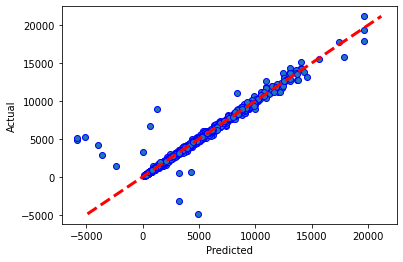

In [7]:
# I'm using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 30)
clf.fit(x_train,y_train)

y_predicted = clf.predict(x_test) # trained model
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() #graph shows that there are some outlayers, I just leave it. hehe

In [8]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set\n--------------------------------------")
print('MAE is {}'.format(mae)) # average predicted price is less than average selling price
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2*100)) # got 94% of accuracy
# good but not best

The model performance for testing set
--------------------------------------
MAE is 184.85446017715432
MSE is 533793.3498449436
R2 score is 94.2441737529626


In [9]:
# gonna find out values for test
print("The test data has",test.shape)
print(test.isnull().sum())

The test data has (3430, 14)
Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2            5
Minimum_price       14
Maximum_price        0
dtype: int64


In [10]:
# Replacing and removing null values as before
test.Stall_no.fillna(0.0,inplace=True)
test.Discount_avail.fillna(0.0,inplace=True)
test.charges_1.fillna(float(int(np.mean(train.charges_1))),inplace=True) # filling with mean
test.charges_2.fillna(float(int(np.mean(train.charges_2))),inplace=True)
test.Minimum_price.fillna(float(int(np.mean(train.Minimum_price))),inplace=True)

Product_id = test.Product_id.copy() # series of Product_id

test.drop(columns=['Customer_name','Product_id'],inplace=True)

print(train.isnull().sum())

for x in test.columns: # encoding
    if test[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[x].values))
        test[x] = lbl.transform(list(test[x].values))

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2           0
Minimum_price       0
Maximum_price       0
dtype: int64


In [11]:
Selling_Price = pd.DataFrame(clf.predict(test))
#applying the model for test dataset to predict Selling_Price

#merge Product_id and Selling_Price
output = pd.concat([Product_id, Selling_Price], axis=1)
output.iloc[:,-1][output.iloc[:,-1] < 0] = 0
output

<ipython-input-11-1b041e8842d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.iloc[:,-1][output.iloc[:,-1] < 0] = 0


,Product_id,0
0,SCHE4YSTDVPVZVXW,3301.335975
1,ACCEGCATKHNRXUHW,2095.193050
2,NKCE6GJ5XVJDXNNZ,10787.451136
3,NKCEB8BK3ZXDHDHM,9287.764200
4,TOPEFDXSAHRNPF94,5191.234048
...,...,...
3425,BBAE9K7BXFUTDNBK,4012.548705
3426,RTRDYPA4PJHCJCGF,9043.558416
3427,TUNE8FWQBS7TVVT7,5037.605100
3428,NKCEGMUABCRGUZPE,3305.491200


In [12]:
#converting to csv file (required to submit)
output.to_csv('Selling_Price.csv',index=False)
output

,Product_id,0
0,SCHE4YSTDVPVZVXW,3301.335975
1,ACCEGCATKHNRXUHW,2095.193050
2,NKCE6GJ5XVJDXNNZ,10787.451136
3,NKCEB8BK3ZXDHDHM,9287.764200
4,TOPEFDXSAHRNPF94,5191.234048
...,...,...
3425,BBAE9K7BXFUTDNBK,4012.548705
3426,RTRDYPA4PJHCJCGF,9043.558416
3427,TUNE8FWQBS7TVVT7,5037.605100
3428,NKCEGMUABCRGUZPE,3305.491200
